In the recent years, the anime industry has grown significantly, Japan and around the world, consequently, many series, movies, ovas, etc. have been created by that industry. Either focused for children, teens or adults.

Therefore, we would like to get significant features of each anime to know how they influence the score of viewers with respect to other animes.

Finally, we are going to give some recommendations on how an anime could have a better chance of being more highly rated.

In [ ]:
! python -m pip install --upgrade pip

In [ ]:
#AnimeDataset

This dataset contains information about 17.562 anime and the preference from 325.772 different users. In particular, this dataset contain:

The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
Ratings given by users to the animes that they has watched completely.
Information about the anime like genre, stats, studio, etc.
HTML with anime information to do data scrapping. These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_anime=pd.read_csv(r"C:\Users\hp\Desktop\PythonCoding\Excel-Projects\anime.csv")
df_anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
#object data-str or mixed

In [ ]:
# Data Cleaning and Data Transformation

In [ ]:
#We are going to clean the columns ‘Aired’, ‘Premiered’ and ‘Duration’ to create new columns with more useful information for analysis.

I will create the column called "Start year", where will be the year where the anime was released

In [ ]:
df_anime['Start year'] = df_anime['Aired'].apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[1] if len(x) > 1 else x[0] ).apply(
                          lambda x : x.replace(' ', ''))

I will create the column called "Anime season", where are the variables: fall, winter, spring, summer. What is the time when the new anime come out

In [ ]:
df_anime['Anime season'] = df_anime['Premiered'].apply(lambda x : x.split(' ')[0])

I will create a column called "Duration in minutes", where are the number of minutes that the anime lasted

In [ ]:
df_anime['Duration in minutes'] = df_anime['Duration'].apply(lambda x : x.split(' ')).apply(lambda x : x[0] if len(x) <= 1 else 
        (x[0] if x[1] == 'min.' else
        (int(x[0]) / 60 if x[1] == 'sec.' else 
        (int(x[0]) * 60 if x[1] == 'hr.' and len(x) < 3 else
        (int(x[0]) * 60 + int(x[2]) if x[1] == 'hr.' and x[2] != 'per' else 
         int(x[0]) * 60  )))))

In [ ]:
##DATA TRANSFORMATION

In [ ]:
#We will eliminate the columns that will not serve us for this exploratory analysis 
df_anime.drop(['MAL_ID','Name' , 'English name' , 'Japanese name' , 'Aired', 'Members','Premiered', 'Favorites', 
               'Duration','Watching', 'Completed', 'On-Hold', 'Dropped', 'Ranked', 'Popularity',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'] , axis = 1 , inplace = True)

In [ ]:
df_anime

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,Unknown,115
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23
...,...,...,...,...,...,...,...,...,...,...,...,...
17557,Unknown,"Adventure, Mystery, Supernatural",ONA,Unknown,Unknown,Unknown,Unknown,Novel,Unknown,2021,Unknown,Unknown
17558,Unknown,"Comedy, Horror, Supernatural",TV,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,2021,Unknown,Unknown
17559,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",TV,Unknown,Unknown,Unknown,Unknown,Visual novel,R - 17+ (violence & profanity),2021,Summer,Unknown
17560,Unknown,"Adventure, Slice of Life, Comedy",TV,Unknown,Kadokawa,Unknown,8bit,Manga,PG-13 - Teens 13 or older,Unknown,Unknown,Unknown


In [ ]:
#We will eliminate the rows that have a score as "Unknown" because they may be animes that have just been released or because it was not valued
index_name_eliminate = df_anime[df_anime['Score'] == 'Unknown'].index

df_anime.drop(index_name_eliminate , inplace = True)

In [ ]:
df_anime

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,Unknown,115
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23
...,...,...,...,...,...,...,...,...,...,...,...,...
17504,6.59,Comedy,ONA,4,Unknown,Unknown,Unknown,Original,PG-13 - Teens 13 or older,2021,Unknown,Unknown
17505,7.52,"Music, Romance",Music,1,Unknown,Unknown,"10Gauge, Studio DURIAN",Original,G - All Ages,2021,Unknown,4
17512,6.83,"Slice of Life, Comedy",Special,1,Unknown,Unknown,Unknown,Game,PG - Children,2021,Unknown,10
17513,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,1,Unknown,Unknown,CloverWorks,Manga,R - 17+ (violence & profanity),2021,Unknown,23


In [ ]:
#Replace the Unknown variable (which was not a null but an object) to Null
df_anime['Start year'] = df_anime['Start year'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].replace('Unknown' , np.nan) 
df_anime['Anime season'] = df_anime['Anime season'].replace('Unknown' , pd.NA)
df_anime['Type'] = df_anime['Type'].replace('Unknown' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Source'] = df_anime['Source'].replace('Unknown' , pd.NA)
df_anime['Rating'] = df_anime['Rating'].replace('Unknown' , pd.NA)

In [ ]:
#The data type where it should be int or float is object , so we change it to int or float , respectively.
df_anime.Score = df_anime.Score.astype('float')
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].astype('float')
df_anime['Episodes'] = df_anime['Episodes'].astype('int')

In [ ]:
#Replace values 99999999999 with pd.NA
df_anime['Start year'] = df_anime['Start year'].replace('999999999' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace(999999999 , pd.NA)

In [ ]:
df_anime

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24.0
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,<NA>,115.0
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24.0
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25.0
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17504,6.59,Comedy,ONA,4,Unknown,Unknown,Unknown,Original,PG-13 - Teens 13 or older,2021,<NA>,NaN
17505,7.52,"Music, Romance",Music,1,Unknown,Unknown,"10Gauge, Studio DURIAN",Original,G - All Ages,2021,<NA>,4.0
17512,6.83,"Slice of Life, Comedy",Special,1,Unknown,Unknown,Unknown,Game,PG - Children,2021,<NA>,10.0
17513,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,1,Unknown,Unknown,CloverWorks,Manga,R - 17+ (violence & profanity),2021,<NA>,23.0


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 17552
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                12421 non-null  float64
 1   Genres               12421 non-null  object 
 2   Type                 12421 non-null  object 
 3   Episodes             12316 non-null  object 
 4   Producers            12421 non-null  object 
 5   Licensors            12421 non-null  object 
 6   Studios              12421 non-null  object 
 7   Source               10443 non-null  object 
 8   Rating               12310 non-null  object 
 9   Start year           12414 non-null  object 
 10  Anime season         3813 non-null   object 
 11  Duration in minutes  12398 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
df_anime.describe()

,Score,Duration in minutes
count,12421.000000,12398.000000
mean,6.509999,26.572381
std,0.886717,25.358223
min,1.850000,0.050000
25%,5.930000,9.000000
50%,6.520000,24.000000
75%,7.140000,29.000000
max,9.190000,163.000000


In [ ]:
df_anime['Episodes']= pd.to_numeric(df_anime['Episodes'])#Make float

In [ ]:
df_anime.describe()

,Score,Episodes,Duration in minutes
count,12421.000000,12316.000000,12398.000000
mean,6.509999,11.329165,26.572381
std,0.886717,42.797634,25.358223
min,1.850000,1.000000,0.050000
25%,5.930000,1.000000,9.000000
50%,6.520000,2.000000,24.000000
75%,7.140000,12.000000,29.000000
max,9.190000,1818.000000,163.000000


In [ ]:
df_anime.columns

Index(['Score', 'Genres', 'Type', 'Episodes', 'Producers', 'Licensors',
       'Studios', 'Source', 'Rating', 'Start year', 'Anime season',
       'Duration in minutes'],
      dtype='object')

Numerical variables: 'Score' , 'Episodes', 'Duration in minutes'

Categorical variables: 'Genres' , 'Type' , 'Producers' , 'Licensors' , 'Studios' , 'Source' , 'Rating' , 'Start year' , 'Anime season'.

##NUMERICS

###SCORE

In [ ]:
!pip install seaborn --upgrade

In [ ]:
conda update ---all


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: ---all


<AxesSubplot:xlabel='Score', ylabel='Count'>

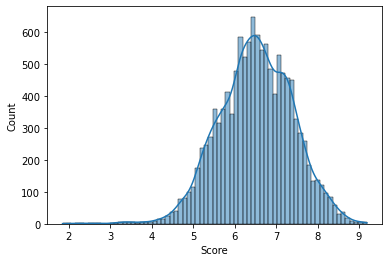

In [ ]:
#View data distribution
sns.histplot(data = df_anime , x = 'Score' , kde = True)

<AxesSubplot:ylabel='Score'>

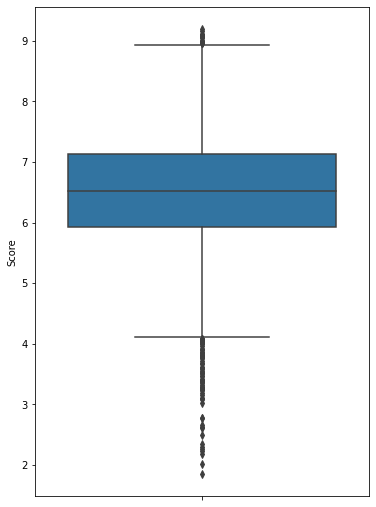

In [ ]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Score')

The score has outliers, either maximum or minimum values. I can affirm that more than 50% of my data has a score of more than 6.

In [ ]:
###Episodes

In [ ]:
df_anime.Episodes.describe()

count    12316.000000
mean        11.329165
std         42.797634
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: Episodes, dtype: float64

<AxesSubplot:ylabel='Episodes'>

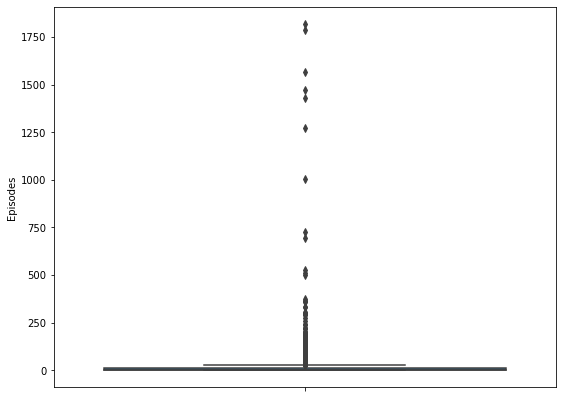

In [ ]:
plt.figure(figsize=(9,7))
sns.boxplot(data = df_anime , y = 'Episodes'  )

75% of my data only comes in 12 or more chapters. This is usually the standard number of chapters an anime


In [ ]:
#Duration In minutes

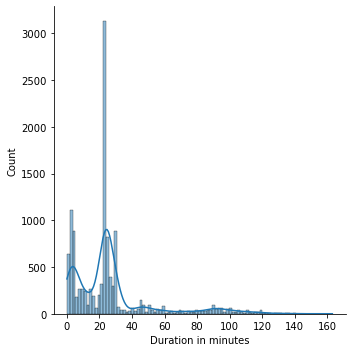

In [ ]:
#View data distribution
sns.displot(data = df_anime , x = 'Duration in minutes' , kde = True)

The distribution tells us that most of our data is between 20 and 40 minutes.

<AxesSubplot:ylabel='Duration in minutes'>

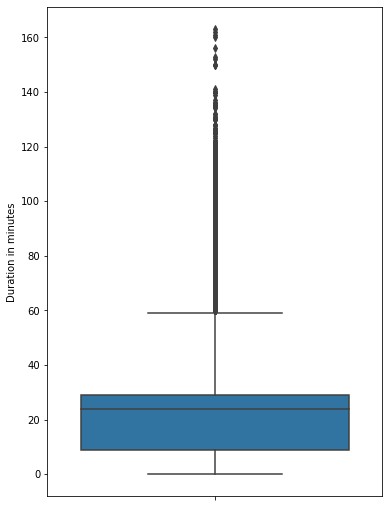

In [ ]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Duration in minutes')

There are outliers . There are anime that have 60 to more minutes . These can be anime movies. While 50% of my data is about 23 minutes (which is ideal) in an anime series, there are outliers.

In [ ]:
#CATEGORIES

In [ ]:
def to_ID(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
#Genres

Here we separate the genres to have a better analysis of them. Since they were in a list

In [ ]:
df_anime['Genres_Split'] = df_anime['Genres'].apply(lambda x : x.replace(' ' , ''))
df_anime['Genres_Split'] = df_anime['Genres_Split'].apply(lambda x : x.split(','))

In [ ]:
gs_top10=to_ID(df_anime['Genres_Split']).value_counts().head(10).index
ngs_top10=to_ID(df_anime['Genres_Split']).value_counts().head(10)

In [ ]:
ngs_top10

Comedy         4559
Action         3312
Fantasy        2452
Adventure      2288
Sci-Fi         2185
Drama          2051
Shounen        1796
Romance        1724
School         1433
SliceofLife    1370
dtype: int64

<AxesSubplot:>

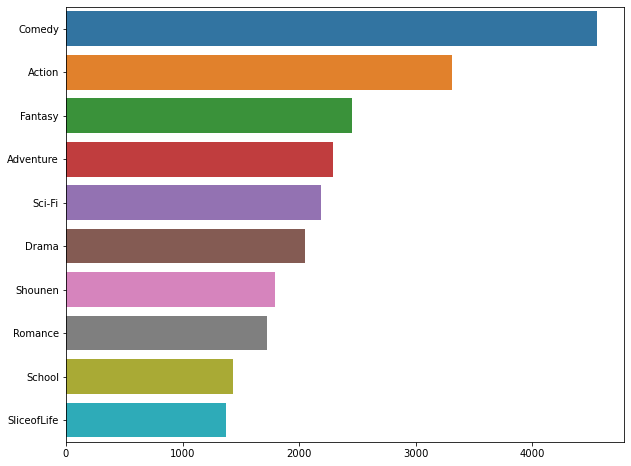

In [ ]:
#TOP 10 OF SEPARATE GENRES 

plt.figure(figsize=(10,8))

sns.barplot(y = gs_top10 , x = ngs_top10 )

In the dataset there are more comedy genres

In [ ]:
#Type

In [ ]:
df_anime['Type'].value_counts()

TV         3837
OVA        2999
Movie      2017
Special    1754
ONA        1084
Music       730
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

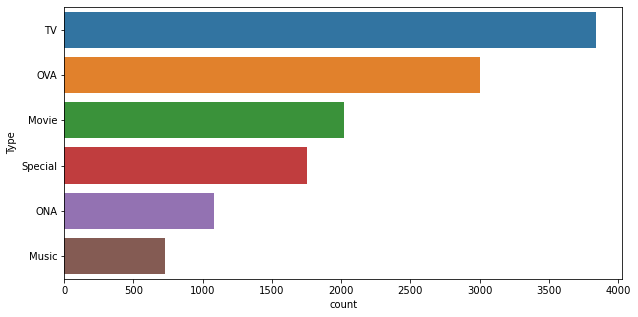

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime , y = 'Type' , order = df_anime['Type'].value_counts().index)

There are more TV type anime in the dataset

Producers

In [ ]:
#As with the genres column, the same is done in this producers column.
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.replace(' ' , ''))
df_anime['Producers_Split']= df_anime['Producers_Split'].apply(lambda x : x.split(','))

In [ ]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
producer_top10 = to_1D(df_anime['Producers_Split']).value_counts()[1:11].index
nproducer_top10  = to_1D(df_anime['Producers_Split']).value_counts()[1:11]

In [ ]:
#TOP 10 PRODUCERS WHO HAVE MADE THE MOST ANIMES 
nproducer_top10

Aniplex         476
Lantis          436
TVTokyo         436
BandaiVisual    393
Movic           323
PonyCanyon      288
Sotsu           288
AT-X            285
Dentsu          281
FujiTV          266
dtype: int64

<AxesSubplot:>

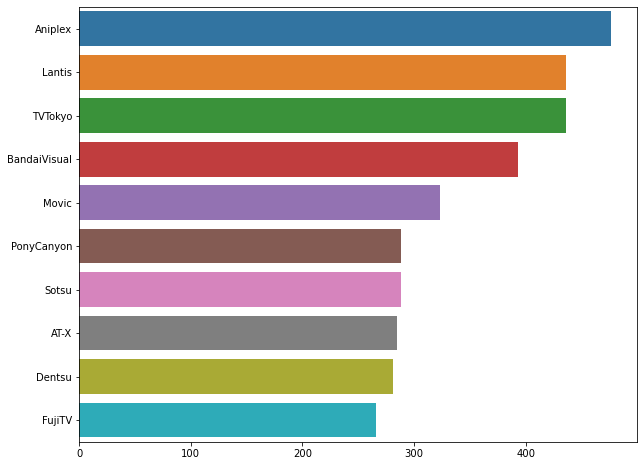

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = producer_top10 , x = nproducer_top10 )

Aniplex has produced the most anime according to the dataset.

In [ ]:
#LICENSORS

In [ ]:
#As in the genres and producers columns, the separation of the following is carried out
df_anime['Licensors_Split'] = df_anime['Licensors'].apply(lambda x : x.replace(' ' , ''))
df_anime['Licensors_Split']= df_anime['Licensors_Split'].apply(lambda x : x.split(','))

In [ ]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
licensors_top10 = to_1D(df_anime['Licensors_Split']).value_counts()[1:11].index
nlicensors_top10  = to_1D(df_anime['Licensors_Split']).value_counts()[1:11]


In [ ]:
#TOP 10 of the licensors who have made the most animes
nlicensors_top10

Funimation                1116
SentaiFilmworks            743
DiscotekMedia              360
ADVFilms                   292
MediaBlasters              271
BandaiEntertainment        201
AniplexofAmerica           192
GeneonEntertainmentUSA     174
VIZMedia                   173
NozomiEntertainment        134
dtype: int64

<AxesSubplot:>

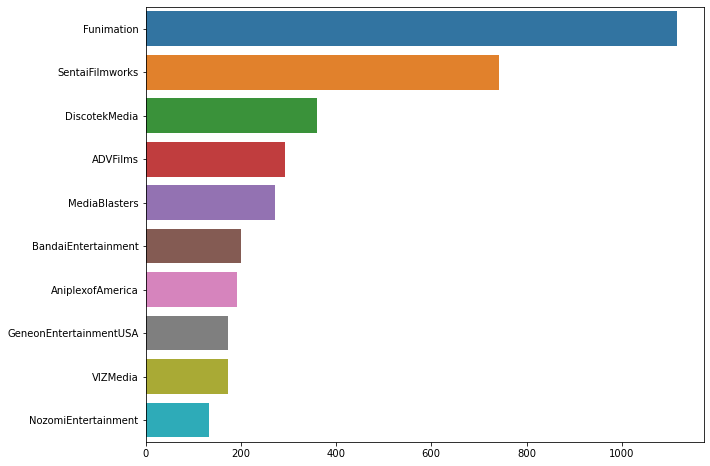

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = licensors_top10 , x = nlicensors_top10 )

We can see that funimation has the most licenses in anime.

Studios

In [ ]:
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.replace(' ' , ''))
df_anime['Studios_Split']= df_anime['Studios_Split'].apply(lambda x : x.split(','))

In [ ]:
studios_top10 = to_1D(df_anime['Studios_Split']).value_counts()[1:11].index
nstudios_top10  = to_1D(df_anime['Studios_Split']).value_counts()[1:11]

In [ ]:
nstudios_top10

ToeiAnimation       604
Sunrise             464
Madhouse            355
J.C.Staff           346
ProductionI.G       312
StudioDeen          262
StudioPierrot       232
TMSEntertainment    226
OLM                 207
A-1Pictures         201
dtype: int64

<AxesSubplot:>

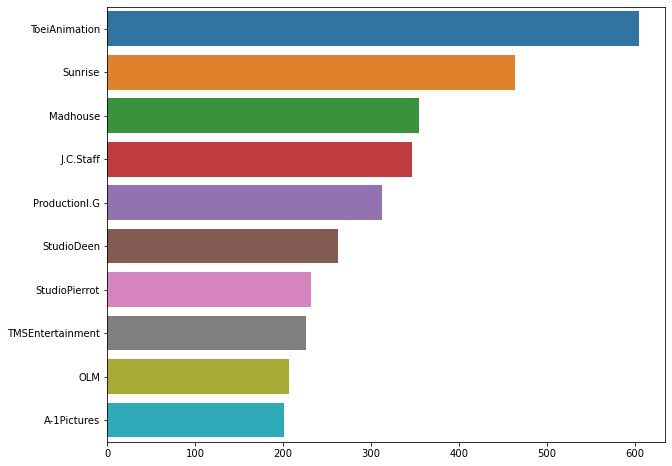

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = studios_top10 , x = nstudios_top10 )

ToeAnimation is the studio with the most anime in the world

In [ ]:
#Source

In [ ]:
source_top10 = df_anime['Source'].value_counts().head(10).index
nsource_top10 = df_anime['Source'].value_counts().head(10)

In [ ]:
nsource_top10

Manga           3413
Original        3083
Visual novel     976
Game             725
Light novel      709
Novel            401
Other            313
4-koma manga     249
Music            203
Web manga        190
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source'>

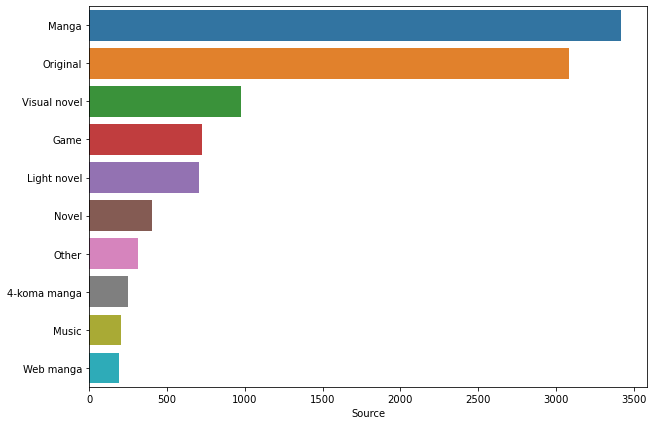

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot( x = nsource_top10 , y= source_top10)

In the dataset there are more anime that come from manga . Then follow the anime that are from original source.



In [ ]:
#Rating

In [ ]:
df_anime['Rating'].value_counts()

PG-13 - Teens 13 or older         5456
G - All Ages                      2663
Rx - Hentai                       1328
R - 17+ (violence & profanity)    1080
R+ - Mild Nudity                   917
PG - Children                      866
Name: Rating, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Rating'>

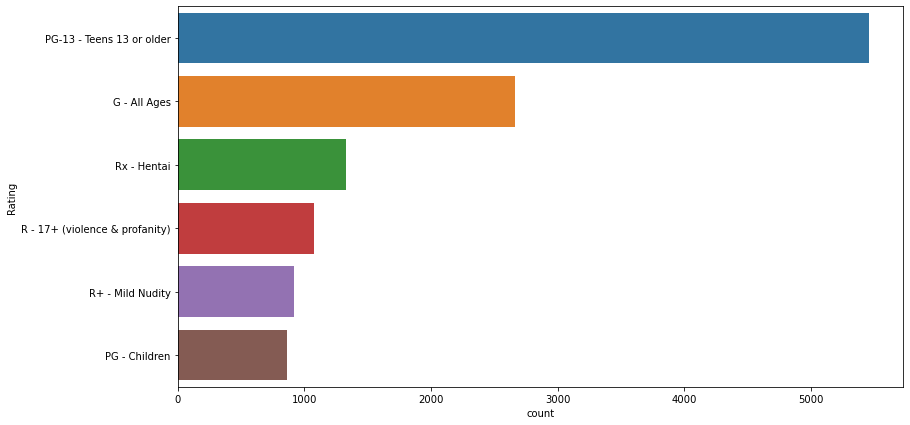

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(data = df_anime , y = 'Rating' , order = df_anime['Rating'].value_counts().index)

In [ ]:
pip install squarify

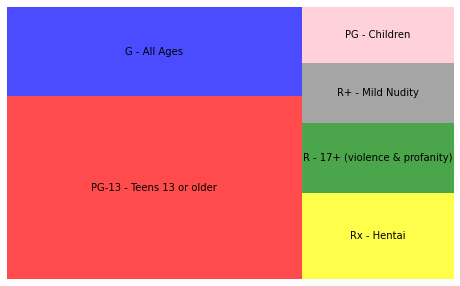

In [ ]:
import squarify
plt.figure(figsize=(8,5))
color = ['red' , 'blue','yellow','green','gray','pink']
squarify.plot(sizes = df_anime['Rating'].value_counts(),  label = df_anime['Rating'].value_counts().index, alpha=0.7 , color = color,
              text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

Most anime are for people 13 and older

Start year

In [ ]:
df_anime['Start year'].unique()

array(['1998', '2001', '2002', '2004', '2005', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1977', '1983', '1980', '1976', '1968',
       '1981', '2007', '1971', '1967', '1975', '1962', '1969', '1965',
       '1974', '1964', '2008', '1972', '1970', '1966', '1963', '1945',
       '2009', '2012', '1933', '1929', '1943', '2010', '1931', '1932',
       '1934', '1936', '1928', '1960', '1958', '2011', '1959', '1930',
       '1947', '1917', '1935', '1938', '1939', '1941', '1942', '1948',
       '1950', '1957', '1961', '1918', '1924', '1926', '1927', '1940',
       '1944', '1946', '1952', '1954', '1956', '2016', '2013', '2019',
       '2014', '2015', '2017', '2018', '1925', '1949', '1937', <NA>,
       '2021', '2020'], dtype=object)

In [ ]:
syear_top10 = df_anime['Start year'].value_counts().head(10).index

nsyear_top10 = df_anime['Start year'].value_counts().head(10)

In [ ]:
nsyear_top10

2016    683
2017    652
2018    638
2014    638
2015    590
2013    572
2012    567
2019    523
2011    512
2010    455
Name: Start year, dtype: int64

<AxesSubplot:xlabel='Start year'>

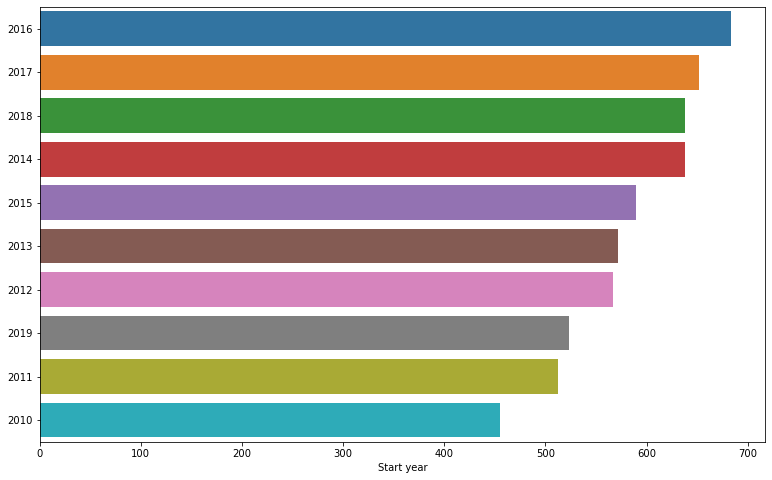

In [ ]:
plt.figure(figsize=(13,8))

sns.barplot(y = syear_top10 , x = nsyear_top10 )

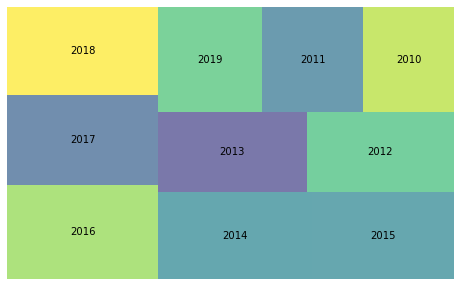

In [ ]:
import squarify
plt.figure(figsize=(8,5))
squarify.plot(sizes = nsyear_top10,  label = syear_top10, alpha=0.7)
plt.axis('off')
plt.show()

2016 was the year that the most anime were released . This was followed by 2017

Anime Season

In [ ]:
animeseason = df_anime['Anime season'].value_counts().head(10).index

nanimeseason = df_anime['Anime season'].value_counts().head(10)

In [ ]:
nanimeseason

Spring    1234
Fall      1131
Winter     795
Summer     653
Name: Anime season, dtype: int64

<AxesSubplot:xlabel='Anime season'>

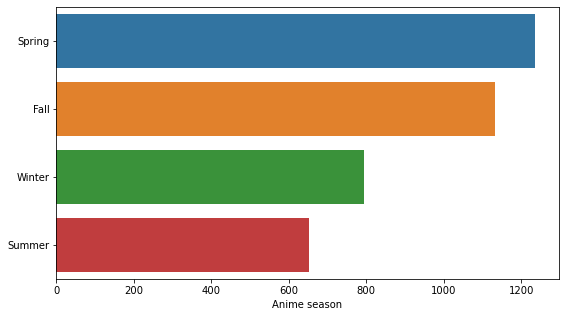

In [ ]:
plt.figure(figsize=(9,5))

sns.barplot(y = animeseason, x = nanimeseason )

Score v Episodes

A correlation will be made between these values

In [ ]:
df_anime['Episodes'].corr(df_anime['Score'] , method = 'spearman')

0.2968140942785327

It has a moderate positive correlation

<AxesSubplot:xlabel='Episodes', ylabel='Score'>

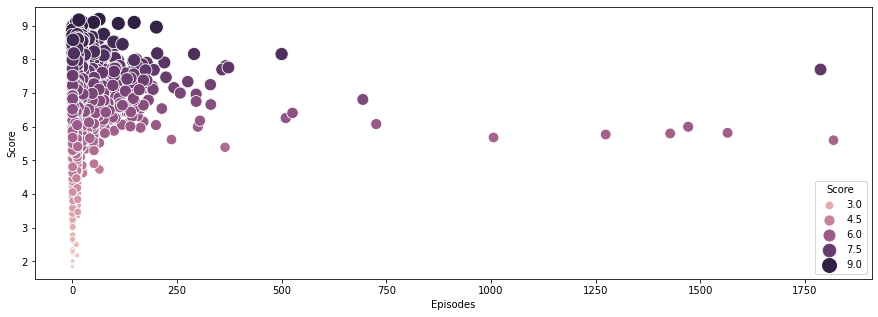

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

I can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence . It may be that a good anime can have 12 chapters and be very good . Or it does not mean by having many chapters , it will have better valuation .

Score v Duration in minutes

In [ ]:
df_anime['Score'].corr(df_anime['Duration in minutes'] , method = 'spearman')

0.2971661791245515

It has a moderate positive correlation

<AxesSubplot:xlabel='Duration in minutes', ylabel='Score'>

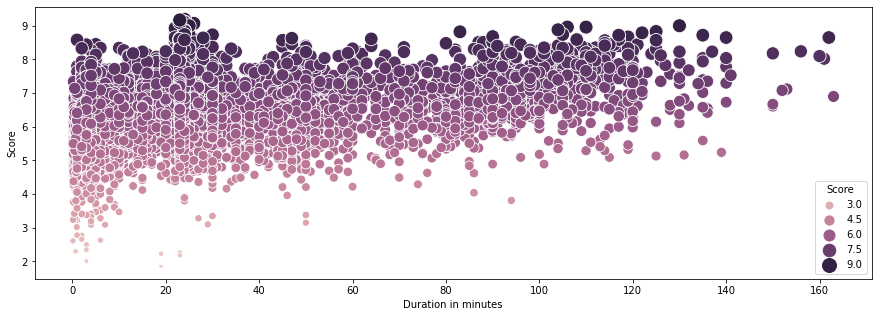

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Duration in minutes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

As the length of the chapters increases, the rating of the anime increases slightly, as it has a positive upward correlation.

